In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.ndimage import maximum_filter
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import numpy as np
import seaborn as sea
from scipy.special import gamma
import matplotlib.patches as mpatches
import dpm
reload(dpm)



plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})

In [52]:
prior_fake_data = {'nu_phi':5.,'cov_phi':np.array([[0.1,0.0],[0.0,0.1]]),\
        'a_alpha':5.,'b_alpha':1.,\
        'mean_psi_loc':np.array([1.0,1.0]),'cov_psi_loc':np.array([[2.,0.0],[0.0,2.]]),\
        'nu_psi_cov':np.array([10.]),'cov_psi_cov':np.array([[1.,0.0],[0.0,1.]])}

mix_fake_data = dpm.DPM(prior_fake_data,data=fake_data,indv_phi=False,n=50)


In [53]:
mix_fake_data.mcmc_step(n_step=1)

In [47]:
mix_fake_data.nu_phi

5.0

In [73]:
#make some fake MVM data
weights = np.ones(5) / 5.
data_size = 300
dim = 2
fake_data = np.zeros((data_size,dim))

n_means = 5
means = np.array([])
for i in range(n_means):
    means=np.hstack([means,stats.uniform.rvs(0,2,size=2)])
    
means = means.reshape(n_means,2)

cov_1 = np.array([[0.035, 0.00],[0.00, 0.035]])
cov_2 = np.array([[0.045, 0.0042],[0.0042,.045]])
cov_3 = np.array([[0.05, 0.004],[0.0042,.05]])
cov_4 = np.array([[0.01, 0.0],[0.0,.01]])
cov_5 = np.array([[0.015, 0.01],[0.01,.015]])

covs = np.dstack([cov_1,cov_2,cov_3,cov_4,cov_5])

j_arr = []
for i in range(data_size):
    j = np.argmin(np.ma.masked_less(np.cumsum(weights) - np.random.uniform(),0))
    j_arr.append(j)
    fake_data[i,:] = stats.multivariate_normal.rvs(mean=means[j,...],cov=cov_1)

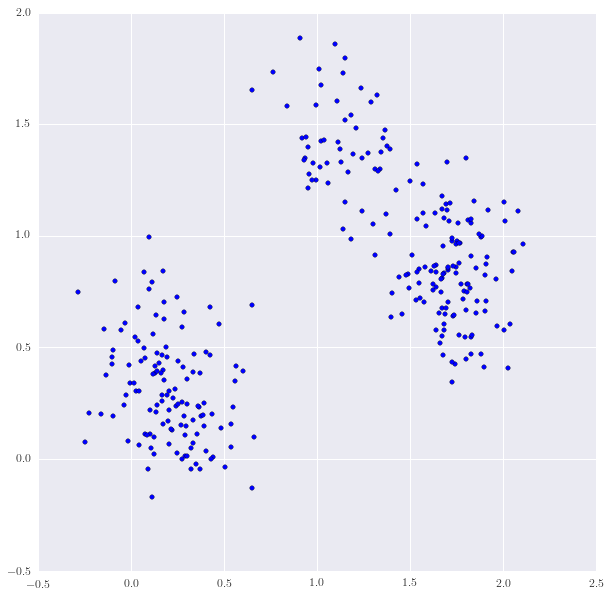

In [74]:
fig,ax = plt.subplots(figsize=(10,10))
plt.scatter(fake_data[:,0],fake_data[:,1])
#fig.savefig('fake_data.pdf')

(array([ 61.,   0.,  50.,   0.,   0.,  75.,   0.,  64.,   0.,  50.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

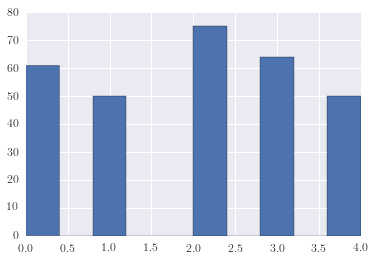

In [75]:
plt.hist(j_arr)

In [76]:
means

array([[ 1.70852953,  0.96395209],
       [ 1.1263435 ,  1.47937922],
       [ 0.2365617 ,  0.21016649],
       [ 1.73752919,  0.70773422],
       [ 0.037305  ,  0.47180196]])

In [12]:
np.tile(foo,(5,1)).reshape(5,2,2)

array([[[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]]])